In [1]:
!pip install emoji

In [2]:
!pip install vaderSentiment

In [3]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
tweets = pd.read_csv("cyberbullying_tweets.csv")

In [5]:
tweets.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [6]:
tweets['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.remove("not")
stop_words.add("rt") #for twitter retweet
stop_words.remove("against")
# stop_words

In [9]:
twitter_string = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [10]:
tweets["processed_tweet"] = tweets["tweet_text"].str.lower()

In [11]:
#remove tags to people and 
# retweet links of the people 
# and also remove stopwords
# and convert emoji to words

tweets["processed_tweet"] = tweets["processed_tweet"] \
                            .apply(lambda x: re.sub(twitter_string,' ', x)) \
                            .apply(lambda x : [value for value in x.split(" ") if not value.startswith("@") and value not in stop_words]) \
                            .apply(lambda x : ' '.join(x)) \
                            .apply(lambda x : x.translate(str.maketrans('', '', string.punctuation))) \
                            .apply(lambda x: emoji.demojize(x)) 

In [12]:
tweets.to_csv("Intermediate_file.csv")

In [13]:
tweets

,tweet_text,cyberbullying_type,processed_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads not concerned another ang...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl expected anything depended anything ...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner not withhold disappointment turner call...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck therealexel youre nigger fucking unfo...


### Exploratory Data Analysis

In [77]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

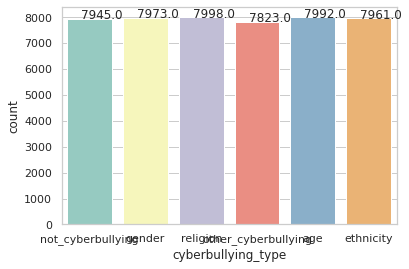

In [98]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="cyberbullying_type",palette="Set3",data=tweets)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

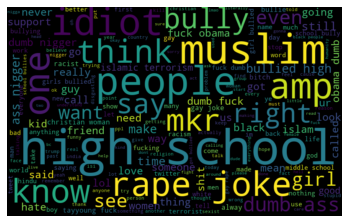

In [86]:
allwords = ' '.join([twts for twts in tweets['processed_tweet']])
wordCloud = WordCloud(width=800,height=500,random_state=21,max_font_size=115).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


# Sentiment Analysis

In [14]:
sid_obj = SentimentIntensityAnalyzer()

In [15]:
tweets['sentiments'] = tweets['processed_tweet'].apply(lambda x: sid_obj.polarity_scores(str(x)))

In [16]:
tweet_sentiment = tweets['sentiments'].apply(pd.Series)

In [17]:
tweets = tweets.merge(tweet_sentiment, left_index=True, right_index=True)

In [18]:
tweets.head()

,tweet_text,cyberbullying_type,processed_tweet,sentiments,neg,neu,pos,compound
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,"{'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...",0.422,0.294,0.284,-0.3400
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads not concerned another ang...,"{'neg': 0.094, 'neu': 0.504, 'pos': 0.403, 'co...",0.094,0.504,0.403,0.6488
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like...,"{'neg': 0.239, 'neu': 0.427, 'pos': 0.333, 'co...",0.239,0.427,0.333,0.0258


In [19]:
tweets.rename(columns = {"neu":"Neutral", "negative":"Negative", "pos":"Positive", "compound":"Total_Sentiment_Score"}, inplace=True)

In [20]:
tweets.head()

,tweet_text,cyberbullying_type,processed_tweet,sentiments,neg,Neutral,Positive,Total_Sentiment_Score
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,"{'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...",0.422,0.294,0.284,-0.3400
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads not concerned another ang...,"{'neg': 0.094, 'neu': 0.504, 'pos': 0.403, 'co...",0.094,0.504,0.403,0.6488
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like...,"{'neg': 0.239, 'neu': 0.427, 'pos': 0.333, 'co...",0.239,0.427,0.333,0.0258


# TFIDF Matrix

In [67]:
#Importing TFIDFVectorizer
#min_df value determines lower base limit of tfidf value
#Max_features can be regulated to limit maximum columns of tfidf
from sklearn.feature_extraction.text import TfidfVectorizer  
v = TfidfVectorizer(max_features=1000,min_df=0.01,max_df=1.0,analyzer='word')

In [69]:
#Storing tfidf values using processed tweets column as train set
x = v.fit_transform(tweets['processed_tweet'])
tokens=v.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
#Creating TFIDF table dataframe using sentences vs processed tweets 

df_tfidfvect = pd.DataFrame(data = x.toarray(),index =tweets['tweet_text'],columns=tokens)

In [71]:
print(df_tfidfvect)
df_tfidfvect.to_csv("TFIDF_Matrix.csv")

                                                    actually  ...  yes
tweet_text                                                    ...     
In other words #katandandre, your food was crap...       0.0  ...  0.0
Why is #aussietv so white? #MKR #theblock #ImAC...       0.0  ...  0.0
@XochitlSuckkks a classy whore? Or more red vel...       0.0  ...  0.0
@Jason_Gio meh. :P  thanks for the heads up, bu...       0.0  ...  0.0
@RudhoeEnglish This is an ISIS account pretendi...       0.0  ...  0.0
...                                                      ...  ...  ...
Black ppl aren't expected to do anything, depen...       0.0  ...  0.0
Turner did not withhold his disappointment. Tur...       0.0  ...  0.0
I swear to God. This dumb nigger bitch. I have ...       0.0  ...  0.0
Yea fuck you RT @therealexel: IF YOURE A NIGGER...       0.0  ...  0.0
Bro. U gotta chill RT @CHILLShrammy: Dog FUCK K...       0.0  ...  0.0

[47692 rows x 177 columns]
